# Worksheet 06

Name: Pranesh Jayasundar 
UID: U08334002

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

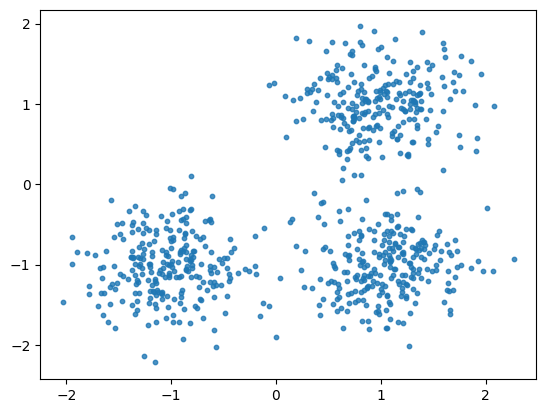

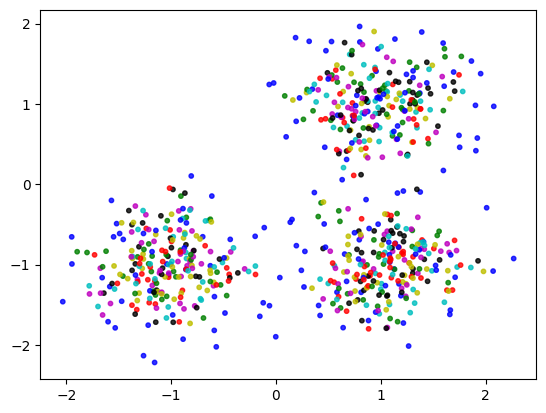

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon, assignments = None):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments = assignments if assignments is not None else [0] * len(dataset)


    def is_core(self, i):
        neighbors = []

        for j in range(len(self.dataset)):
            if i != j and np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                neighbors.append(j)
        return len(neighbors) >= self.min_pts

    def get_neighborhood(self, i):
        neighbors = []

        for j in range(len(self.dataset)):
            if i != j and self.assignments[j] != 0 and np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                neighbors.append(j)
        return neighbors


    def dfs_assign(self, i, cluster_num):
        self.assignments[i] = cluster_num
        neighbors = self.get_neighborhood(i)
        while neighbors:
            next_neighbor = neighbors.pop()
            if self.assignments[next_neighbor] != 0:
                continue
            self.assignments[next_neighbor] = cluster_num

            if self.is_core(next_neighbor):
                neighbors += self.get_neighborhood(next_neighbor)
        return self.assignments

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        assignments = [0 for _ in range(len(self.dataset))]
        cluster_num = 1
        for i in range(len(self.dataset)):
            if assignments[i] != 0:
                # already assigned to a cluster, no need to re-evaluate
                continue
            if self.is_core(i):
                assignments = self.dfs_assign(i, cluster_num)
                
            cluster_num += 1
        return assignments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 30)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()